### Sravanthi Mummadi Week 1 KNN assignment
## K-NN classification on wisconsin breast cancer dataset and Wine Quality dataset
The goal of the project is to 
1.find type of cancer whether it is benign or malignant with given features like radius, texture, smoothness etc on      wisconsin breat cancer dataset.
2.find quality of wine whether it is class 1 or class 2 or class 3 with given features like alchohal,magnesium color, etc on    wine quality dataset.
3.checking Accuracy, precision, Recall and F1 score with different k values.
4.Estimation of  best k value with Grid search Cross validation method.

In [412]:
# installing required packages
!pip install scikit-learn

# Import a bunch of libraries.
import pandas as pd
import time
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report


### Data Extraction
Data extracted from UCI machine learning Repository.Dataset contains 33 columns with 569 observations.

In [414]:
path = 'C:\\Users\\kgajj\\Downloads\\data.csv'
wbcd = pd.read_csv(path)
wbcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data cleaning
All features are in required format , so there is no need of Data tranformation.The target variable is diagnosis. ONly one unnamed column is there, so i deleted that column.there are no missing values in any column.

In [416]:
wbcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [417]:
# checking for duplicates
wbcd.drop_duplicates(inplace=True)
wbcd.shape 

(569, 33)

In [418]:
# id will not make at impact on type of cancer so i dropped id and unnamed column. remaining features took as predictors.
wbcd.feature_names = wbcd.drop(wbcd.columns[[0,1,-1]], axis = 1)

In [419]:
wbcd.target = wbcd['diagnosis']

In [420]:
wbcd.feature_names.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Exploration
For all numeric columns performed univariate analysis and bi variate analysis to see the distribution and correlation of data.

Text(0.5, 1.0, 'Univariate Analysis')

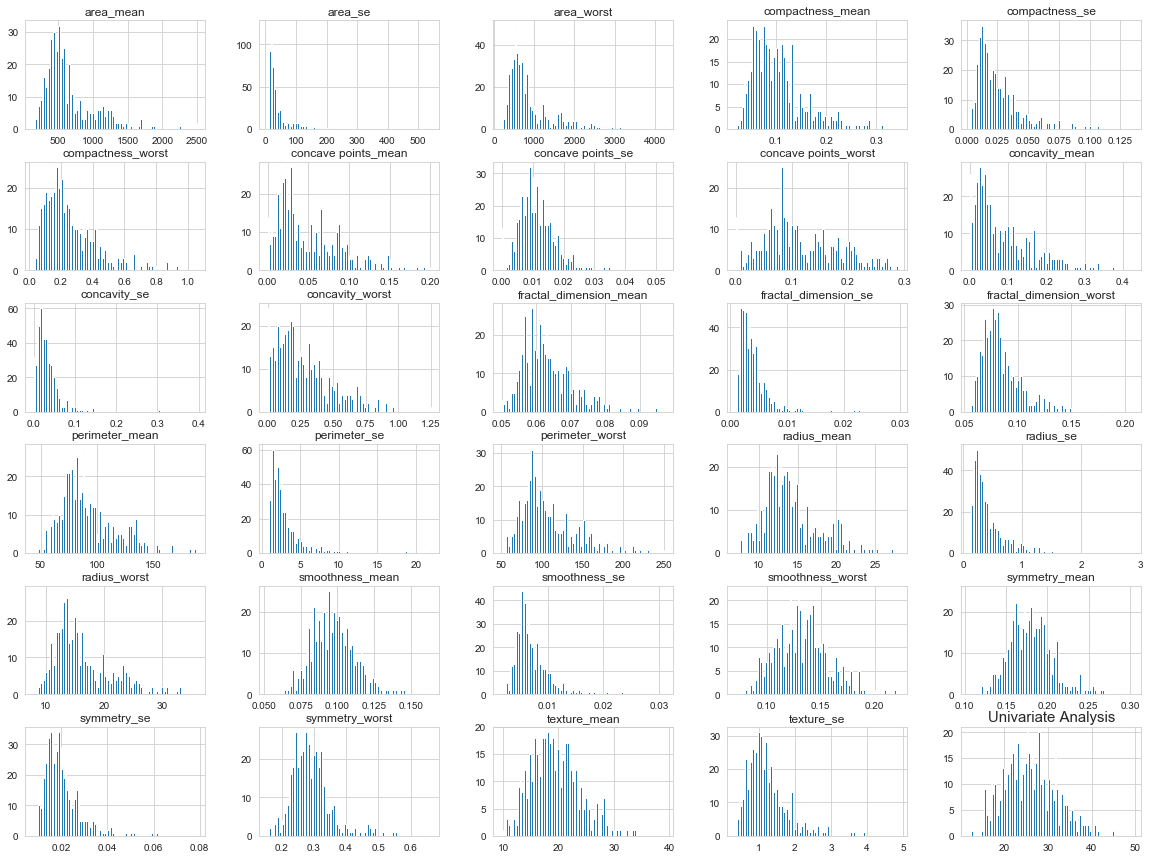

In [421]:
#Uni variate Analysis
%matplotlib inline
import matplotlib.pyplot as plt
wbcd.feature_names.hist(bins=100, figsize=(20,15))
plt.title("Univariate Analysis", size = 15)

All most all columns have normal distribution except the area_se.but some features are in large numbers. we can standardize them.

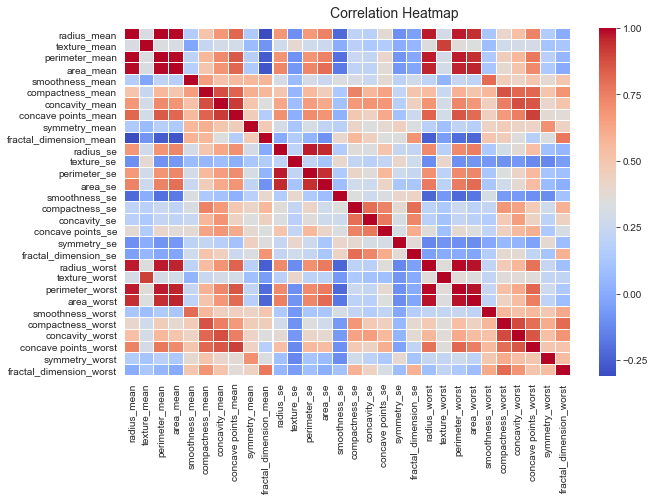

In [422]:

import seaborn as sns
sns.set_style('whitegrid')
# Correlation Matrix Heatmap
fig, ax = plt.subplots(figsize=(10, 6))
#attributes = ["Avg_Sale_To_List", "Homes_Sold", "Inventory", "Median_Sale_Price","New_Listings"]
corr = wbcd.feature_names.corr()
hm = sns.heatmap(round(corr,2),  ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
fig.subplots_adjust(top=0.93)
t = fig.suptitle('Correlation Heatmap', fontsize=14)
plt.show()

from the above correlation plot, Most of the columns have good correlation.only few features does not have good correlation.

### splitting the data for training and testing

In [423]:
# importing train_test_split method from sklearn.model  for splitting the data
from sklearn.model_selection import train_test_split


In [424]:
# splitted the data into  80% and 20% for training and testing respectively
X_train,X_test,y_train,y_test = train_test_split(wbcd.feature_names,wbcd.target,test_size=0.2,random_state=4)

In [425]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


In [426]:
print(y_train.shape)
print(y_test.shape)

(455,)
(114,)


In [427]:
# standardizing the data as features with large numbers impact the K-NN model.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [428]:
#importing the model from sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# training the model
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_train,y_train)
#knn.fit(X_train,y_train)

# testing the model
y_pred = knn.predict(X_test)

# checking the accuaracy of the model
scores = metrics.accuracy_score(y_test,y_pred)
print(scores)

0.9649122807017544


Knn model gave 96.4% accuracy when numnber of neighbours is 5.

In [429]:

print(y_test.value_counts())
# confusion matrix values for the model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

B    80
M    34
Name: diagnosis, dtype: int64
[[78  2]
 [ 2 32]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        80
           M       0.94      0.94      0.94        34

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



From Confusion matrix observed that, the precision is 99% which means out of all malignant predicted malignant. Recall is 97%, which means out of all benign how many actally are benign.f1 is calculated based on precision and recall values

In [430]:
# checking the model with different k values from  to 40
import numpy as np
Accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

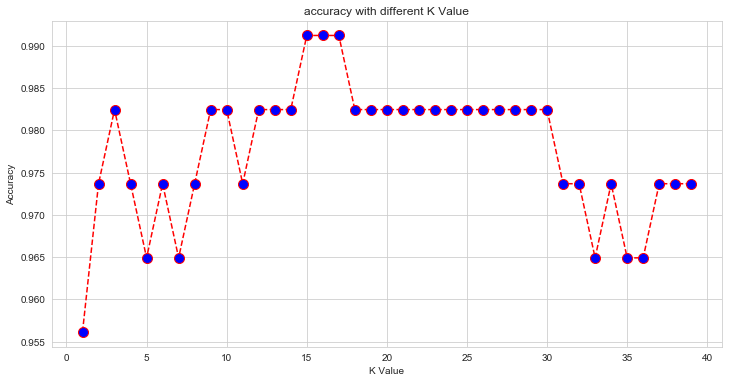

In [431]:
#plotted the model accuarcy plot with different K values
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), Accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('accuracy with different K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

checked accuracy with different k values using for loop. from the above plot we can see that when k is between 5 to 8 accuracy is very high almost 99%
 From the above graph, we can see that k value from 15 to 18 the accuracy is very high (99%) and at k=1 the accuaracy is low. with out the standardization the accuaracy is very low.

###  cross validation for best k value estimation using Grid search CV

In [432]:
# the parameter values that should be searched k_range is between 1 to 31
k_range = list(range(1, 31))
# created a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
knn_grid = KNeighborsClassifier()
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
#print(param_grid)
# instantiate the grid
grid = GridSearchCV(knn_grid, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In 10 fold cross validation, we fit it with the training data. it makes 10 folds in training data by splitting it into equal samples.In that it splits the data into testing and checks for the best k value with less error and high accuracy.In Grid search 10 fold Cross validation,default distance metric is minkowski but the p value is 2 means it is Euclidean distnce. 

In [433]:
# view the complete results (list of named tuples)
grid.cv_results_


{'mean_fit_time': array([0.00179539, 0.00089493, 0.00119364, 0.00129414, 0.00109336,
        0.00089843, 0.00129249, 0.00218964, 0.00109372, 0.00169063,
        0.00129936, 0.00090227, 0.00100169, 0.00099292, 0.00089779,
        0.00109353, 0.00099871, 0.00099428, 0.00100148, 0.00120113,
        0.0011935 , 0.0010915 , 0.00109885, 0.00100205, 0.00100129,
        0.001197  , 0.00099173, 0.00109687, 0.00109994, 0.00098846]),
 'std_fit_time': array([5.97748141e-04, 2.98426797e-04, 3.93078698e-04, 4.48655636e-04,
        2.92687380e-04, 2.99805273e-04, 6.33332588e-04, 1.39673109e-03,
        3.00990934e-04, 8.88178099e-04, 6.41750749e-04, 3.00996732e-04,
        1.22947262e-05, 1.47754901e-05, 2.99263361e-04, 3.00966212e-04,
        2.39951451e-06, 9.78274749e-06, 1.29499921e-05, 3.96961714e-04,
        4.00782602e-04, 3.01286898e-04, 2.98571453e-04, 1.24651882e-05,
        1.25952047e-05, 3.98685615e-04, 1.39478740e-05, 3.03127883e-04,
        2.98186586e-04, 1.83400925e-05]),
 'mean_scor

In every split, it trains and tests with different k values in range of k.

In [434]:
# examine the first tuple
#  Cross validated scores
print('Parameters')
print(grid.cv_results_["params"][0])

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV mean train score')
print(grid.cv_results_["mean_train_score"])

# Mean of the 10 scores
print('')
print(' CV Mean test score')
print(grid.cv_results_['mean_test_score'])

Parameters
{'n_neighbors': 1}

CV mean train score
[1.         0.97020567 0.97875301 0.97118367 0.97484758 0.96581005
 0.96703135 0.96654414 0.97191835 0.96678745 0.96996236 0.96434722
 0.96483443 0.96068331 0.9621497  0.95677609 0.95897301 0.95311337
 0.956531   0.95286887 0.95433586 0.95287006 0.95409315 0.95238225
 0.95409137 0.95213716 0.95458215 0.95116095 0.95287244 0.94920675]

 CV Mean test score
[0.94065934 0.94945055 0.96263736 0.95604396 0.96043956 0.95824176
 0.96263736 0.95824176 0.96263736 0.95824176 0.96263736 0.95604396
 0.95604396 0.95604396 0.95604396 0.95164835 0.95164835 0.95164835
 0.95164835 0.94945055 0.95384615 0.94945055 0.94945055 0.94505495
 0.94945055 0.94285714 0.94505495 0.94505495 0.94505495 0.94505495]


Text(0, 0.5, 'mean train score')

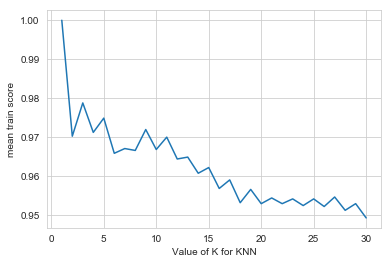

In [435]:
# plot the results
plt.plot(k_range,grid.cv_results_["mean_train_score"])
plt.xlabel('Value of K for KNN')
plt.ylabel('mean train score')

Text(0, 0.5, 'mean test score')

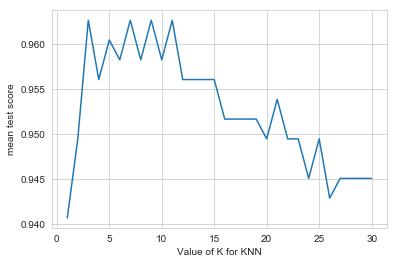

In [436]:
# plot the results
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('mean test score')

In [437]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9626373626373627
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


From Cross validation the best k value is 3
default distance is Euclidean
Accuracy with best K value is 96%

In [438]:
# Cross validation with hyper parametertuning with weight options uniform and distance
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [439]:
# created a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [440]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=39, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [441]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00249674, 0.00119638, 0.00110099, 0.00100143, 0.00129831,
        0.00119729, 0.00109353, 0.0011003 , 0.00109792, 0.00109675,
        0.0011884 , 0.00119963, 0.00159314, 0.00149632, 0.00099638,
        0.00089705, 0.00109694, 0.00139663, 0.00268817, 0.00119736,
        0.00119674, 0.0012006 , 0.00099421, 0.00099275, 0.00109277,
        0.00110173, 0.0010983 , 0.00099595, 0.00110691, 0.00099149,
        0.00109725, 0.00109727, 0.00110004, 0.00129848, 0.00098999,
        0.00109727, 0.00120173, 0.00100071, 0.00109751, 0.00099735,
        0.00099318, 0.00109708, 0.00099382, 0.00119267, 0.00109816,
        0.00120027, 0.00150051, 0.00149577, 0.00089831, 0.00099168,
        0.00109949, 0.00109854, 0.00109446, 0.00099328, 0.00109596,
        0.00100281, 0.00120239, 0.00120132, 0.00099912, 0.0009968 ]),
 'std_fit_time': array([1.28628710e-03, 3.97512402e-04, 2.98412002e-04, 9.46858008e-06,
        4.49584344e-04, 3.98016447e-04, 2.86215505e-04, 2.98345277e-04,
     

In [442]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print (grid.best_estimator_)
# Best score did not improve for this model

0.9626373626373627
{'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [443]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
knn.predict(X_test)

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [444]:
 
# GridSearchCV automatically refits the best model using all of the data
# that best fitted model is stored in grid object 
# we can then use prediction using the best fitted model
# code in this cell is the same as the top

grid.predict(X_test)

array(['B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [445]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean', n_jobs=-1).fit(X_train,y_train)
#knn.fit(X_train,y_train)

# testing the model
y_pred = knn.predict(X_test)

# checking the accuaracy of the model
scores = metrics.accuracy_score(y_test,y_pred)
print(scores)

0.9824561403508771


In [446]:
# confusion matrix values for the model
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[80  0]
 [ 2 32]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99        80
           M       1.00      0.94      0.97        34

   micro avg       0.98      0.98      0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



After Cross validation with the best value of k estimated as 3. for the model gave the optimum k value and accuracy is 98%.
Precision is 98% and recall is less 94% compared to precision. malignant is positive class here. because the precision is high means the model predicting malignant more than benign. so the model is evaluating well with K nearest neighbour with k value is 3.

### Wine Quality classification 
Data extracted from Scikit learn.it contains  14 columns and 178 rows. The data is clean so no need of data cleaning.
target varible contains three levels or classes with 0, 1 and 2.so it is a multi class classification.
first splitted the data into training and testing with 70% and 30% respectively.
fitted the Knn model.
tested it with testing data.
did for loop for different k values and plotted accuracy and mean error plots.
did cross validation with GridsearchCv cross validation,with hyper parameter tuning for weight options(uniform, distance) with different k values from range 1 to 20 for best k value.
Fitted the model again with best k value and tested the accuracy precision, recall and fi score

###  Data Extraction

In [456]:
from sklearn.datasets import load_wine
data = load_wine()

In [457]:
# As it is a classifiction dataset it divided with feature names and target variable.
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [454]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [459]:
# before applying model, standrdized the feature columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [458]:
# splitted the data as training and testing
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.3,random_state=4)

In [460]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


In [461]:
print(y_train.shape)
print(y_test.shape)

(124,)
(54,)


In [462]:
# Imported the model from sk learn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# training the model
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean', n_jobs=-1).fit(X_train,y_train)
#knn.fit(X_train,y_train)

# Testing the model
y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test,y_pred)

In [463]:
# Accuracy of the model
scores

0.9814814814814815

In [464]:
# Evaluating the model with Confusion matrix

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[18  0  0]
 [ 1 18  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        17

   micro avg       0.98      0.98      0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [465]:
import numpy as np
Accuracy = []

# Calculating Accuracy for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    Accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

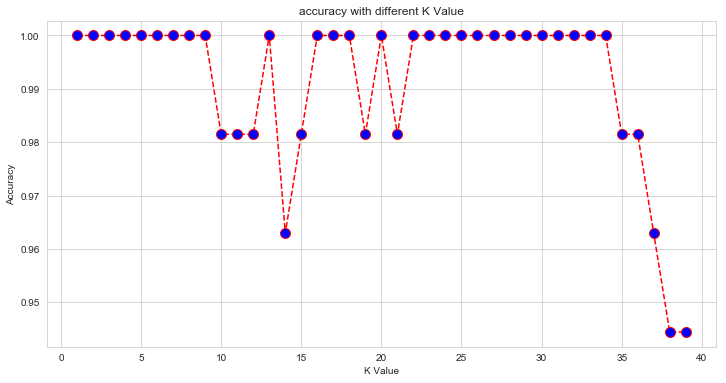

In [466]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), Accuracy, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('accuracy with different K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy')

Text(0, 0.5, 'Mean Error')

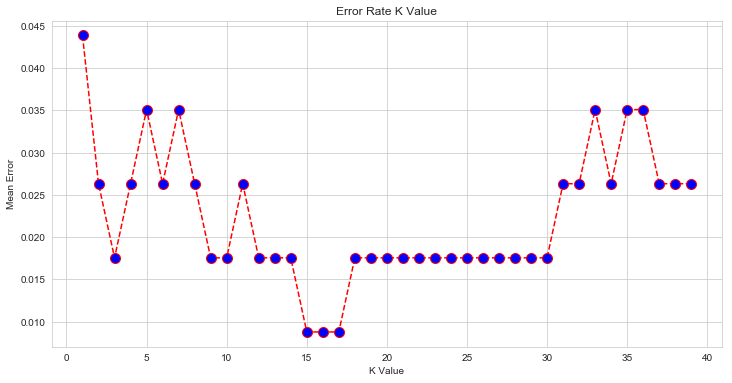

In [467]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

### cross validation

In [468]:
# Cross validation with hyper parametertuning with weight options uniform and distance
# define the parameter values that should be searched
k_range = list(range(1, 21))

# Another parameter besides k that we might vary is the weights parameters
# default options -->uniform (all points in the neighborhood are weighted equally)
# another option -->distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [469]:
# created a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']}


In [470]:
# instantiated and fit the grid
# 10-fold cross-validation is being performed 30 x 2 = 60 times
knn_grid = KNeighborsClassifier()
grid = GridSearchCV(knn_grid, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [329]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([1.14753246e-03, 1.75287724e-03, 5.61594963e-04, 1.13670826e-03,
        1.42407417e-04, 2.23524570e-03, 1.54964924e-03, 4.99033928e-04,
        1.42385960e-03, 5.87201118e-04, 4.39286232e-04, 2.63929367e-05,
        3.53860855e-04, 9.33527946e-04, 1.59742832e-03, 5.55992126e-04,
        8.52584839e-04, 2.74991989e-04, 8.87084007e-04, 1.05178356e-03,
        1.35712624e-03, 9.57250595e-04, 1.07636452e-03, 6.24704361e-04,
        6.03222847e-04, 4.98938560e-04, 1.22649670e-03, 6.77394867e-04,
        3.71456146e-04, 8.90231133e-04, 5.59234619e-04, 1.24967098e-03,
        9.31859016e-04, 1.36795044e-03, 9.39273834e-04, 5.07116318e-04,
        6.62374496e-04, 3.85117531e-04, 8.23497772e-04, 6.14857674e-04]),
 'std_fit_time': array([1.77394832e-03, 1.94758521e-03, 5.72091332e-04, 1.49782209e-03,
        3.11994666e-04, 1.64350724e-03, 1.76103631e-03, 1.20232014e-03,
        1.99243796e-03, 7.13818086e-04, 1.17847990e-03, 7.91788101e-05,
        4.68112289e-04, 1.154

In [471]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print (grid.best_estimator_)
# Best score did not improve for this model

0.967741935483871
{'n_neighbors': 17, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='distance')


In [472]:
# trained model using all data and the best known parameters

#  model with best parameters
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')

# fitted with  X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X_train, y_train)

# make a prediction on out-of-sample data
knn.predict(X_test)

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 0])

In [473]:
# GridSearchCV automatically refits the best model using all of the data
# that best fitted model is stored in grid object 
# we can then use prediction using the best fitted model
# code in this cell is the same as the top

grid.predict(X_test)

array([2, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2,
       1, 2, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 1, 0])

In [474]:
knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean').fit(X_train,y_train)
#knn.fit(X_train,y_train)

# testing the model
y_pred = knn.predict(X_test)

# checking the accuaracy of the model
scores = metrics.accuracy_score(y_test,y_pred)
print(scores)

1.0


In [475]:
# Evaluating the model with Confusion matrix
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))


[[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



From cross validation, best k value estimated for wine quality classification is 8.The accuaracy with k=8 is 70.3%. precision is 79%, recall is 70% and f1 score is 52 %.

### Conclusion:

#### Wisconsin Breast Cancer dataset:

The target Variable contains 2 classes it is binomial classification with K Nearest Neighbour.
With  standardization and Cross validated K value the Evaluation metrics like Precision, Recall and f1 score are having better values. Because the malignant is important or positive class, the precision is very important here.As the model is performing well with cross validated k value. And the prediction results with testing data are good compared to training data, it is not overfitted model.
K nearest neighbour algorithm is working well with this data so we can use this model for this kind of datasets.

#### Wine Quality Dataset:

The target variable contains 3 classes, so it is multi class classification with K nearest Neighbours.
 standardization and Cross validated k value gave almost better results  but not best. Here we can not say which class is important, so we have to check for the all the evalutaion metrics. For this kind of data trying other clssification algorithm is better when compared to Knn as it is not predicting well even with cross validated k value. 
 
kKNN has been used successfully for computer vision applications, including optical character recognition and facial recognition in both still images and video. Also in predicting whether a person will enjoy a movie or music recommendation, etc.
